In [1]:
#import the libraries
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt


In [2]:
#Load the data Spy
data = pd.read_csv('spy1.csv')
#show data
data

,Date,Close/Last,Volume,Open,High,Low
0,03/15/2024,509.83,107646300,510.21,511.7000,508.1220
1,03/14/2024,514.95,110171800,516.97,517.1250,511.8200
2,03/13/2024,515.97,55104090,517.11,517.2900,514.4900
3,03/12/2024,516.78,73114440,513.45,517.3800,510.8600
4,03/11/2024,511.28,62557180,510.48,511.8800,508.5000
5,03/08/2024,511.72,86532540,515.46,518.2201,511.1300
6,03/07/2024,514.81,58652090,513.14,515.8900,509.8053
7,03/06/2024,509.75,68382370,510.55,512.0690,508.4200
8,03/05/2024,507.18,72855620,510.24,510.7000,504.9100
9,03/04/2024,512.30,49799260,512.03,514.2000,512.0000


<Axes: >

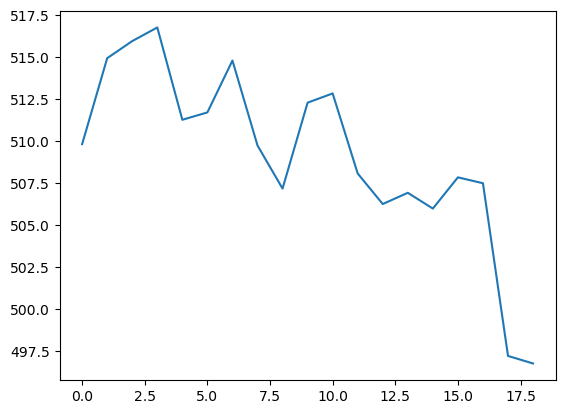

In [3]:
#show the data visually
data['Close/Last'].plot()

In [4]:
#spliot the data into training and testing data sets
train_data = data.iloc[:int(.99*len(data)), :]
test_data = data.iloc[:int(.99*len(data)):, :]

In [5]:
#Define the features and taget variable
features = ['open',['volume']]
target = 'close'


In [14]:
features = ['Open', 'High', 'Low', 'Volume']  # List of feature column names
target = 'Close/Last'  # Target column name
model.fit(train_data[features], train_data[target])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [15]:
#Make and show the prediction 
predictions = model.predict(test_data[features])
print('Model Predicition :')
print(predictions)

Model Predicition :
[509.8301  514.95013 515.96967 516.7785  511.2799  511.7203  514.8105
 509.74994 507.18015 512.2997  512.8497  508.0799  506.25964 506.92972
 505.9915  507.8499  507.49982 497.21124]


In [16]:
#show the actual values
print('Actual Values:')
print(test_data[target])

Actual Values:
0     509.83
1     514.95
2     515.97
3     516.78
4     511.28
5     511.72
6     514.81
7     509.75
8     507.18
9     512.30
10    512.85
11    508.08
12    506.26
13    506.93
14    505.99
15    507.85
16    507.50
17    497.21
Name: Close/Last, dtype: float64


In [18]:
# Assuming 'test_data' is your testing dataset
# and 'features', 'target' are lists of your feature and target column names.

# Calculate the accuracy of the model
accuracy = model.score(test_data[features], test_data[target])
print('Accuracy:')
print(accuracy)

Accuracy:
0.9999999813058197


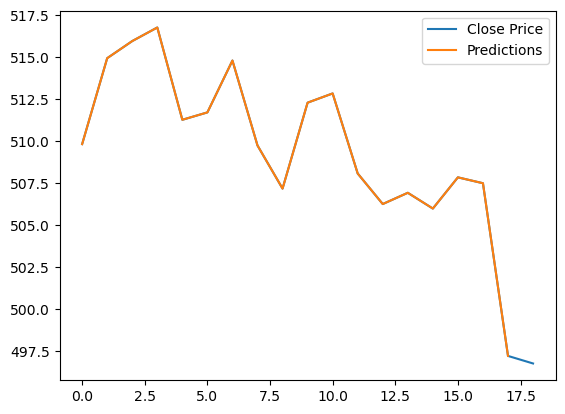

In [20]:
import matplotlib.pyplot as plt

# Assuming 'predictions' is a list or array containing your model's predictions.

# Plot the actual close prices
plt.plot(data['Close/Last'], label='Close Price')  # Corrected 'close' to 'Close/Last' and 'lable' to 'label'

# Plot the predictions
# Make sure 'predictions' is the same length as 'test_data[target]'
# and that it's indexed correctly to align with the dates in 'test_data'
plt.plot(test_data[target].index, predictions, label='Predictions')  # Corrected 'label ='

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()